In [ ]:
# install extras (in Colab)
!pip install -q scikit-learn pandas matplotlib seaborn joblib
# optional
!pip install -q shap streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 62.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
df = pd.read_csv('Dataset Heart Disease.csv')   # or upload via Colab file widget
print(df.shape)
print(df.columns)
df.head()
df.info()
df.describe()

(1048, 13)
Index(['Unnamed: 0', 'age', 'sex', 'chest pain type', 'resting bps',
       'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048 entries, 0 to 1047
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           1048 non-null   int64  
 1   age                  1048 non-null   int64  
 2   sex                  1048 non-null   int64  
 3   chest pain type      1048 non-null   int64  
 4   resting bps          1048 non-null   int64  
 5   cholesterol          1048 non-null   float64
 6   fasting blood sugar  1048 non-null   int64  
 7   resting ecg          1048 non-null   int64  
 8   max heart rate       1048 non-null   int64  
 9   exercise angina      1048 non-null   int64  
 10  oldpeak              1048 non-null   float64
 11

,Unnamed: 0,age,sex,chest pain type,resting bps,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,390.841603,53.325382,0.734733,2.817748,132.613550,245.172710,0.162214,0.606870,142.918893,0.368321,0.942366,1.532443,0.496183
std,307.916633,9.397822,0.441686,1.118649,17.367605,57.101359,0.368823,0.763313,24.427115,0.482579,1.100429,0.611023,0.500224
min,0.000000,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,69.000000,0.000000,-0.100000,0.000000,0.000000
25%,130.750000,46.000000,0.000000,2.000000,120.000000,208.000000,0.000000,0.000000,125.000000,0.000000,0.000000,1.000000,0.000000
50%,262.000000,54.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,144.000000,0.000000,0.600000,2.000000,0.000000
75%,657.250000,60.000000,1.000000,4.000000,140.000000,275.000000,0.000000,1.000000,162.000000,1.000000,1.600000,2.000000,1.000000
max,1189.000000,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
if 'num' in df.columns and 'target' not in df.columns:
    df = df.rename(columns={'num':'target'})

Missing values:
Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Class balance:
target
0    0.503817
1    0.496183
Name: proportion, dtype: float64


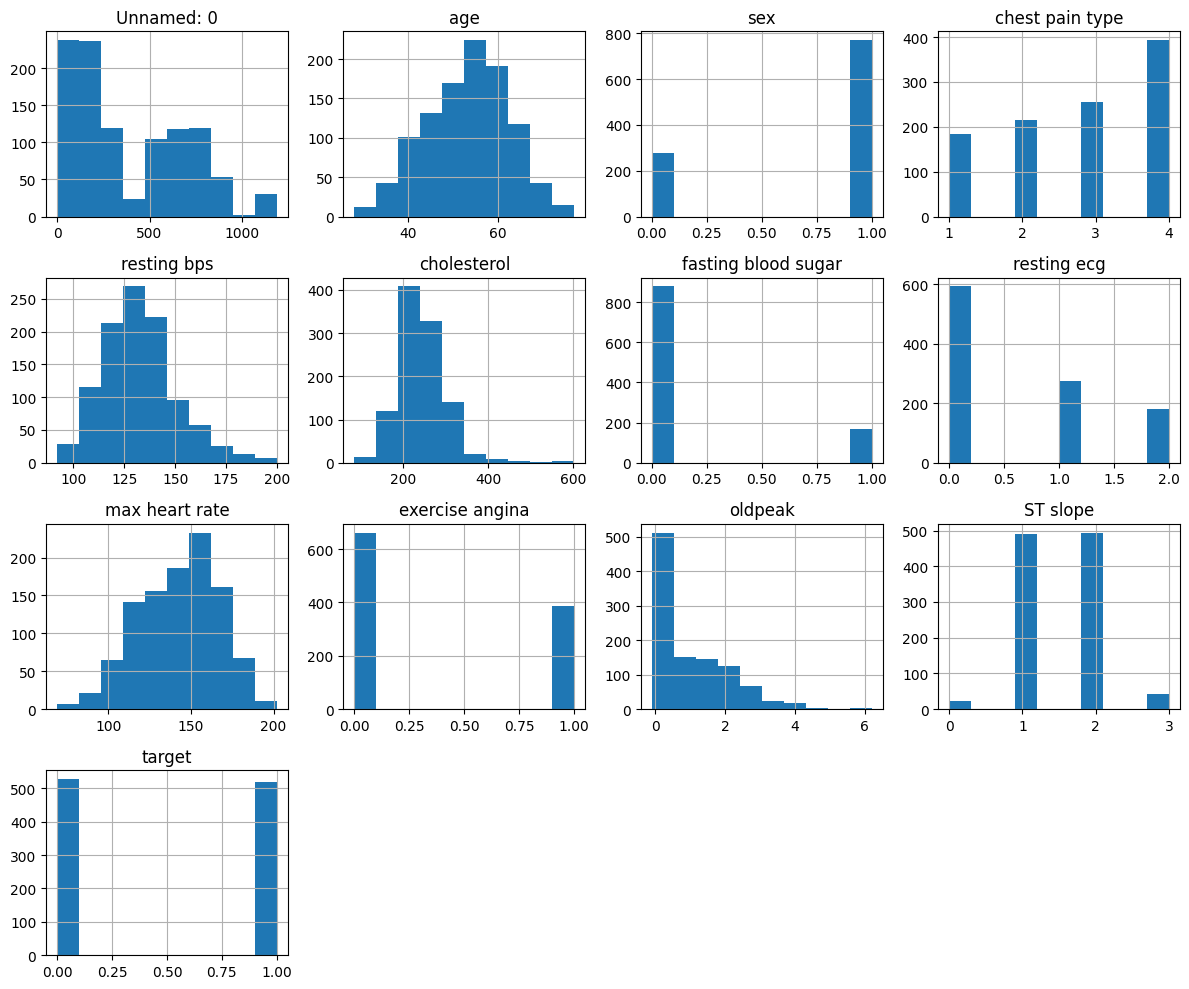

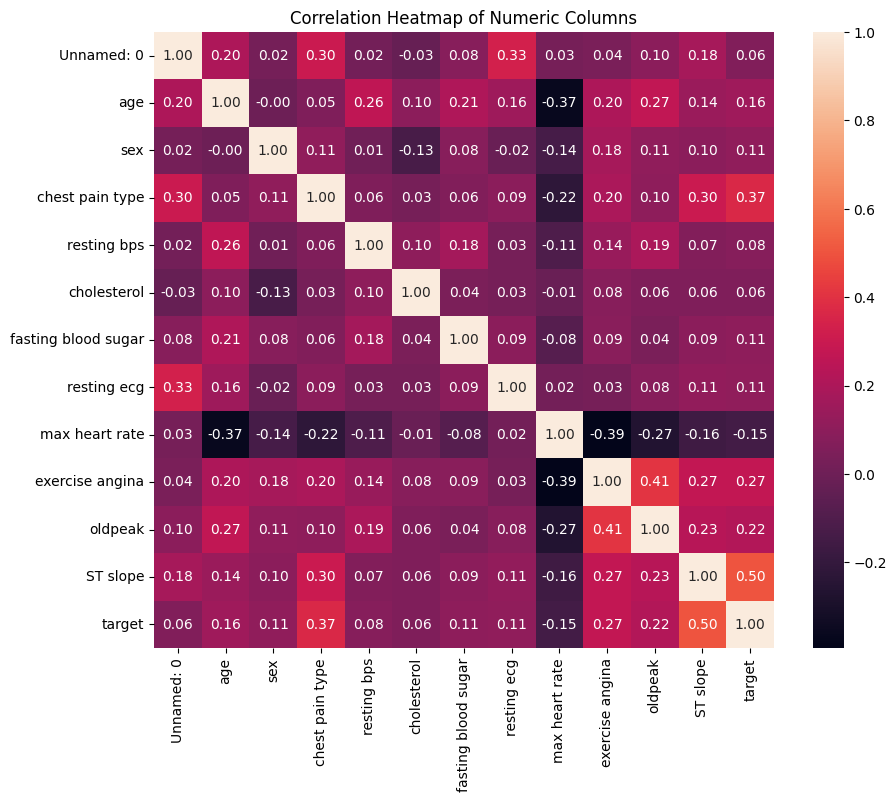

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# missing values
print("Missing values:")
print(df.isnull().sum())

# class balance
print("\nClass balance:")
print(df['target'].value_counts(normalize=True))

# histograms
df.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

# correlation heatmap
plt.figure(figsize=(10,8))
numeric_df = df.select_dtypes(include=['number']) # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

target_col = 'target' # Changed from 'HeartDisease' to 'target'
X = df.drop(columns=[target_col])
y = df[target_col]

# auto-detect numeric / categorical
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

pipe_lr = Pipeline([('preprocessor', preprocessor), ('clf', LogisticRegression(max_iter=1000))])
pipe_dt = Pipeline([('preprocessor', preprocessor), ('clf', DecisionTreeClassifier(random_state=42))])
pipe_rf = Pipeline([('preprocessor', preprocessor), ('clf', RandomForestClassifier(random_state=42))])

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid_lr = {'clf__C':[0.01, 0.1, 1, 10]}
param_grid_dt = {'clf__max_depth':[3,5,7,None], 'clf__min_samples_split':[2,5,10]}
param_grid_rf = {'clf__n_estimators':[100,200], 'clf__max_depth':[None,5,10], 'clf__max_features':['sqrt','log2']}

gs_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=cv, scoring='roc_auc', n_jobs=-1)
gs_dt = GridSearchCV(pipe_dt, param_grid_dt, cv=cv, scoring='roc_auc', n_jobs=-1)
gs_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=cv, scoring='roc_auc', n_jobs=-1)

gs_lr.fit(X_train, y_train)
gs_dt.fit(X_train, y_train)
gs_rf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Unnamed: '
                                                                          '0',
                                                                          'age',
                                                                          'sex',
                                                                          'chest '
                                                                          'pain '
                                                                          'type',
                                                                          'resting '
                                                                          'bps',
                                                                          'cholesterol',
                                                                          'fasting '
                                                                          'blood '
                                                                          'sugar',
                                                                          'rest...
                                                                          'angina',
                                                                          'oldpeak',
                                                                          'ST '
                                                                          'slope']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         [])])),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'clf__max_depth': [None, 5, 10],
                         'clf__max_features': ['sqrt', 'log2'],
                         'clf__n_estimators': [100, 200]},
             scoring='roc_auc')

LogReg  — accuracy: 0.8095238095238095 ROC-AUC: 0.8553156748911463
              precision    recall  f1-score   support

           0       0.81      0.82      0.81       106
           1       0.81      0.80      0.81       104

    accuracy                           0.81       210
   macro avg       0.81      0.81      0.81       210
weighted avg       0.81      0.81      0.81       210



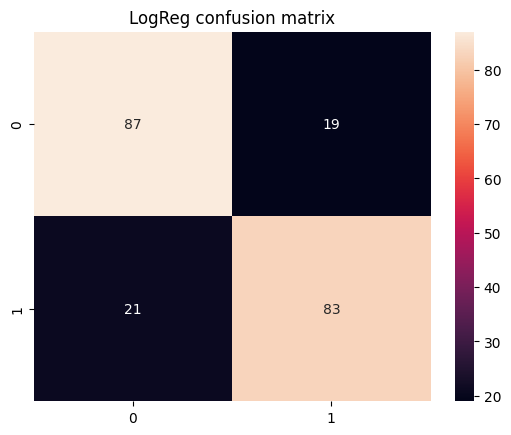

DecisionTree  — accuracy: 0.8142857142857143 ROC-AUC: 0.8724600870827286
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       106
           1       0.82      0.81      0.81       104

    accuracy                           0.81       210
   macro avg       0.81      0.81      0.81       210
weighted avg       0.81      0.81      0.81       210



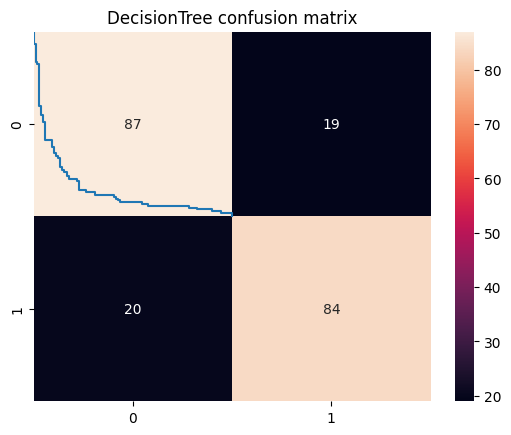

RandomForest  — accuracy: 0.8380952380952381 ROC-AUC: 0.9031204644412192
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       106
           1       0.84      0.83      0.83       104

    accuracy                           0.84       210
   macro avg       0.84      0.84      0.84       210
weighted avg       0.84      0.84      0.84       210



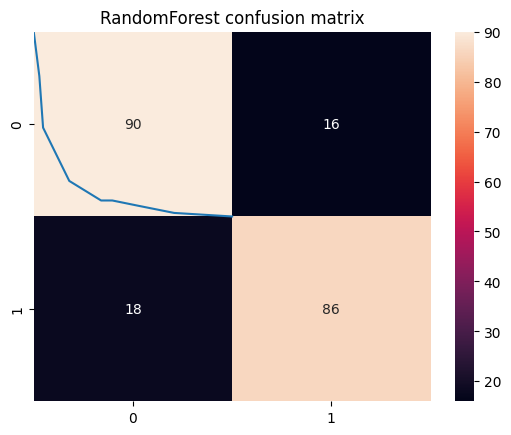

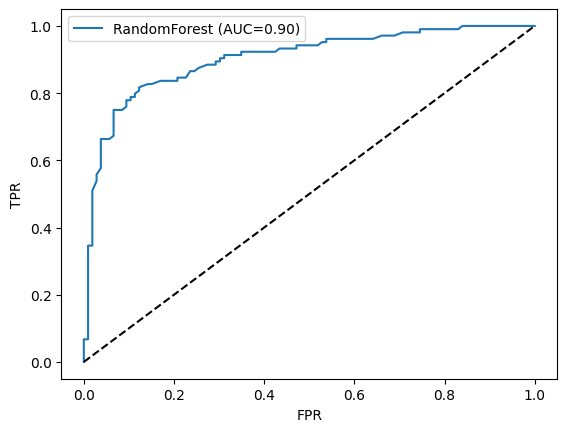

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

best = {'LogReg':gs_lr, 'DecisionTree':gs_dt, 'RandomForest':gs_rf}
for name, gs in best.items():
    preds = gs.predict(X_test)
    proba = gs.predict_proba(X_test)[:,1]
    print(name, " — accuracy:", accuracy_score(y_test, preds), "ROC-AUC:", roc_auc_score(y_test, proba))
    print(classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(name + ' confusion matrix')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, proba):.2f})')
plt.plot([0,1],[0,1],'k--'); plt.xlabel('FPR'); plt.ylabel('TPR'); plt.legend(); plt.show()

Dataset shape: (1048, 13)
Missing values:
 Unnamed: 0             0
age                    0
sex                    0
chest pain type        0
resting bps            0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

=== Decision Tree ===
Accuracy: 0.7476190476190476
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       106
           1       0.74      0.75      0.75       104

    accuracy                           0.75       210
   macro avg       0.75      0.75      0.75       210
weighted avg       0.75      0.75      0.75       210



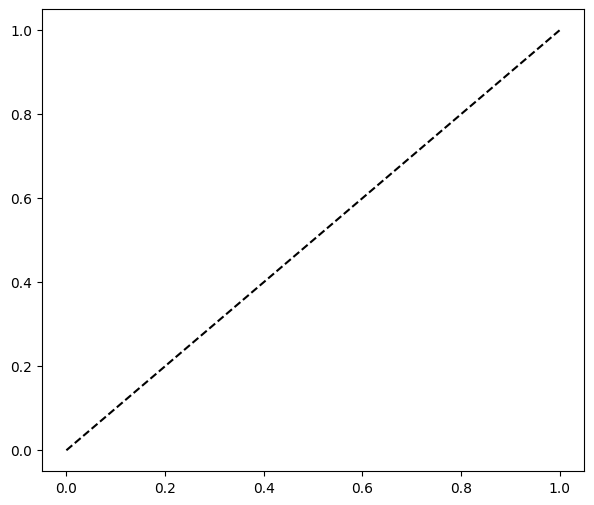

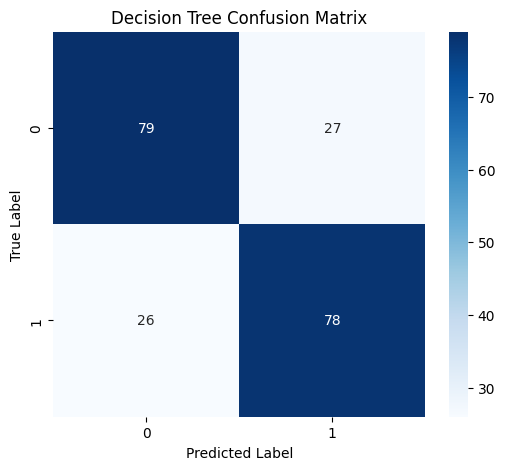


=== Random Forest ===
Accuracy: 0.8476190476190476
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       106
           1       0.84      0.86      0.85       104

    accuracy                           0.85       210
   macro avg       0.85      0.85      0.85       210
weighted avg       0.85      0.85      0.85       210



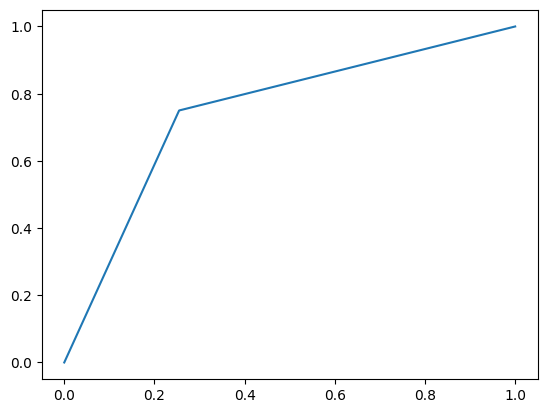

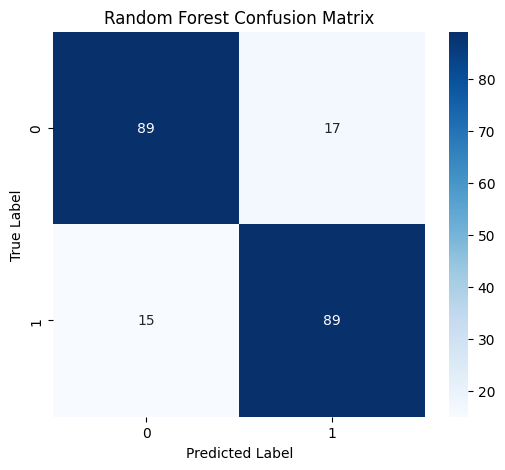


=== SVM ===
Accuracy: 0.5095238095238095
              precision    recall  f1-score   support

           0       0.51      0.61      0.56       106
           1       0.51      0.40      0.45       104

    accuracy                           0.51       210
   macro avg       0.51      0.51      0.50       210
weighted avg       0.51      0.51      0.50       210



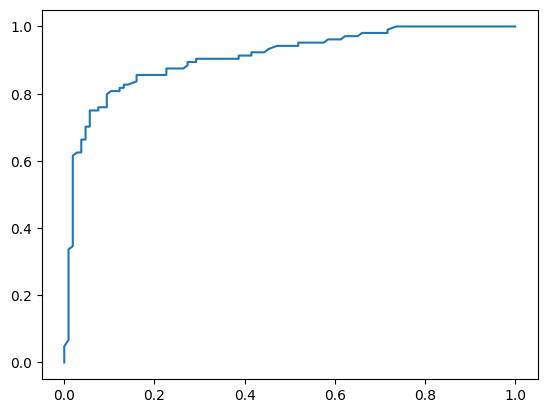

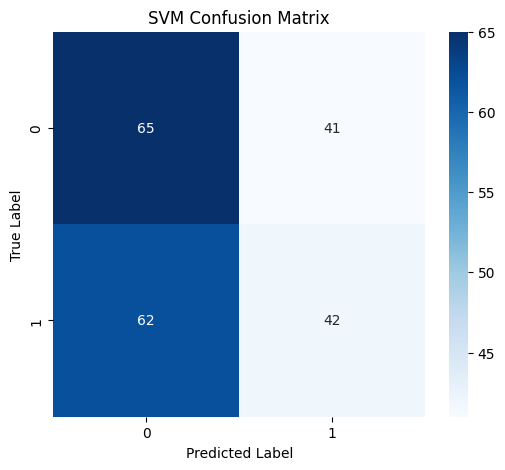


=== PCA + Logistic Regression ===
Accuracy: 0.7952380952380952
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       106
           1       0.83      0.74      0.78       104

    accuracy                           0.80       210
   macro avg       0.80      0.79      0.79       210
weighted avg       0.80      0.80      0.79       210



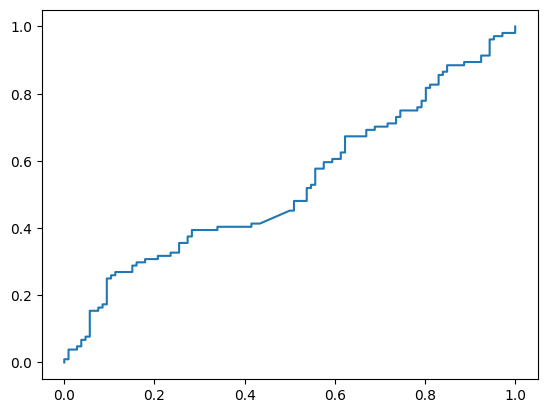

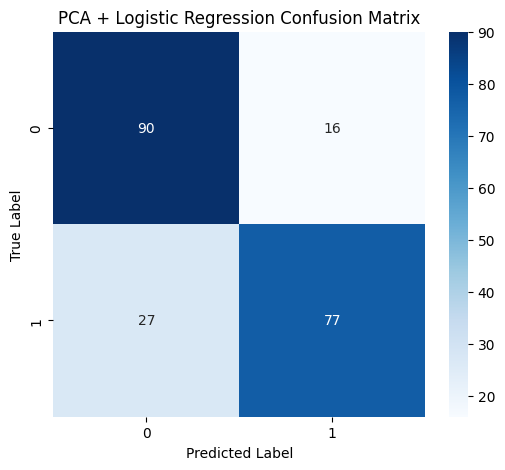

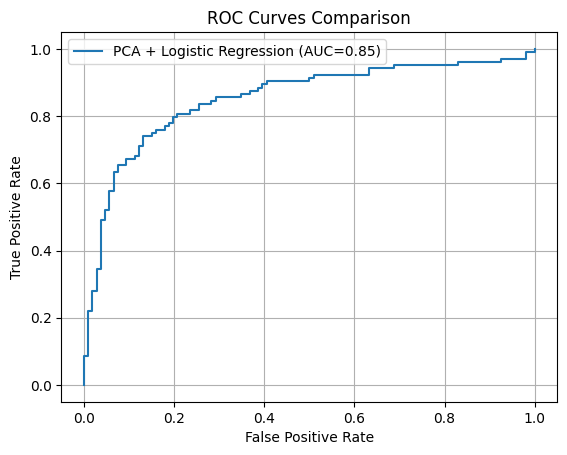


Model Accuracies:
Decision Tree: 0.748
Random Forest: 0.848
SVM: 0.510
PCA + Logistic Regression: 0.795


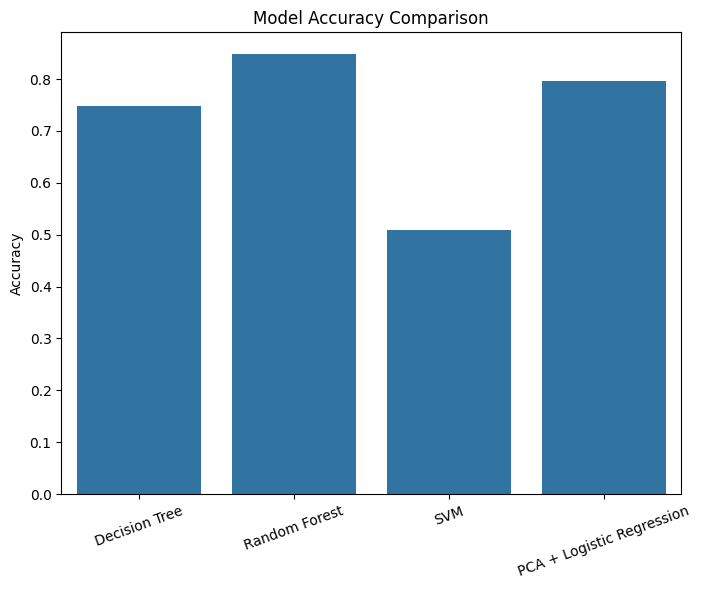


Best model: Random Forest
✅ Best model saved as best_heart_model.pkl


In [ ]:
# ===============================
# HEART DISEASE PREDICTION PROJECT
# (Based on Reference Journal)
# ===============================

# STEP 0: Install packages (Colab only)
# !pip install pandas numpy scikit-learn matplotlib seaborn joblib

# STEP 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder # Import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer # Import SimpleImputer for handling missing values

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import joblib

# ===============================
# STEP 2: Load Dataset
# ===============================
df = pd.read_csv("Dataset Heart Disease.csv")
print("Dataset shape:", df.shape)
df.head()

# ===============================
# STEP 3: Data Preprocessing (Define preprocessor, but apply within pipelines)
# ===============================
# Check missing values
print("Missing values:\n", df.isnull().sum())

# Features and target
X = df.drop(columns=['target'])
y = df['target']

# Identify categorical and numerical columns
# Ensure 'Unnamed: 0' is treated as a numerical column if it's an index
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()
# Remove 'Unnamed: 0' if it's just an index and not a feature
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Create preprocessing pipelines for numerical and categorical features
# Added SimpleImputer to handle potential missing values
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='passthrough' # Keep other columns (like 'Unnamed: 0')
)

# Train-test split (before preprocessing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===============================
# STEP 4: Define Models (with preprocessing in pipelines)
# ===============================
models = {
    "Decision Tree": Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', DecisionTreeClassifier(random_state=42))]),
    "Random Forest": Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))]),
    "SVM": Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(probability=True, kernel='rbf', random_state=42))]),
    "PCA + Logistic Regression": Pipeline(steps=[('preprocessor', preprocessor),
                                               ('pca', PCA(n_components=8)),   # reduce dimensions
                                               ('classifier', LogisticRegression(max_iter=1000))])
}

# ===============================
# STEP 5: Train, Predict, Evaluate
# ===============================
results = {}
# Create a figure for the combined ROC plot later
plt.figure(figsize=(7,6))
plt.plot([0,1],[0,1],'k--', label='Random chance (AUC=0.50)')


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n=== {name} ===")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5)) # Create a new figure for each confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(name + " Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y_test, y_proba):.2f})')

# Final ROC Curve plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()


# ===============================
# STEP 6: Results Comparison
# ===============================
print("\nModel Accuracies:")
for name, acc in results.items():
    print(f"{name}: {acc:.3f}")

plt.figure(figsize=(8,6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=20)
plt.show()

# ===============================
# STEP 7: Save Best Model
# ===============================
best_model_name = max(results, key=results.get)
print("\nBest model:", best_model_name)

best_model = models[best_model_name]
# Retrain the best model with processed data on the full dataset
# Need to use the preprocessor before fitting the model to the full dataset
# The best_model is already a pipeline including the preprocessor, so we just need to fit it to the full X and y
best_model.fit(X, y)
joblib.dump(best_model, "best_heart_model.pkl")
print("✅ Best model saved as best_heart_model.pkl")

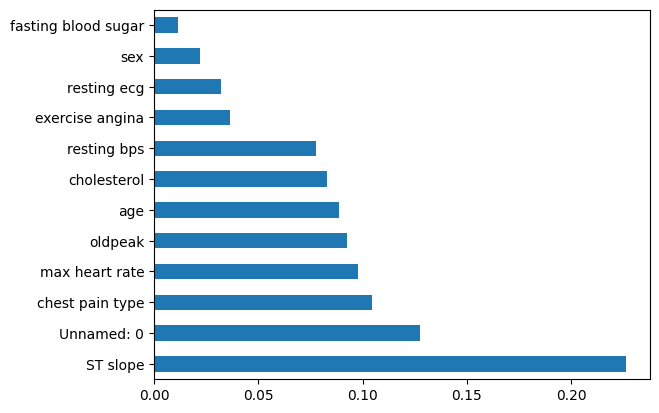

In [ ]:
# Get feature names (only numerical columns as there are no categorical)
feature_names = num_cols # Use numerical column names directly

# Get feature importances from the best RandomForestClassifier estimator
importances = gs_rf.best_estimator_.named_steps['clf'].feature_importances_

# Create a pandas Series for feature importances and plot
fi = pd.Series(importances, index=feature_names).sort_values(ascending=False)
fi.head(15).plot(kind='barh'); plt.show()


=== Logistic Regression ===
Accuracy: 0.810
Precision: 0.814
Recall: 0.798
F1 Score: 0.806
AUC-ROC: 0.855
Gain Coefficient: 4.452


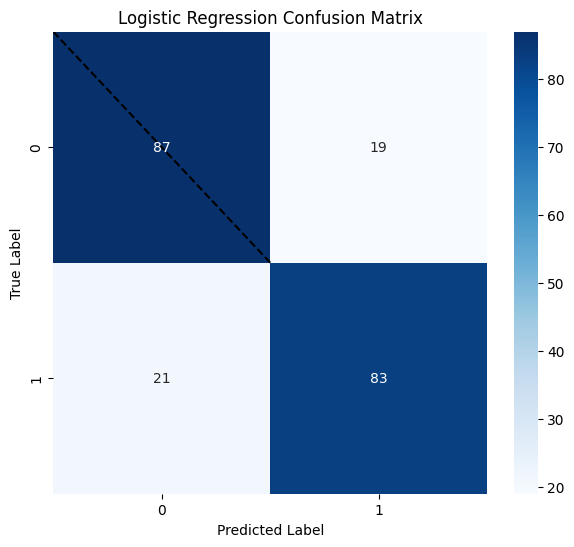


=== Decision Tree ===
Accuracy: 0.814
Precision: 0.816
Recall: 0.808
F1 Score: 0.812
AUC-ROC: 0.872
Gain Coefficient: 4.506


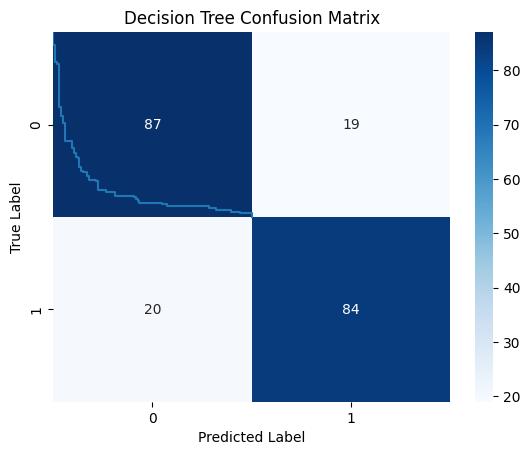


=== Random Forest ===
Accuracy: 0.838
Precision: 0.843
Recall: 0.827
F1 Score: 0.835
AUC-ROC: 0.903
Gain Coefficient: 5.478


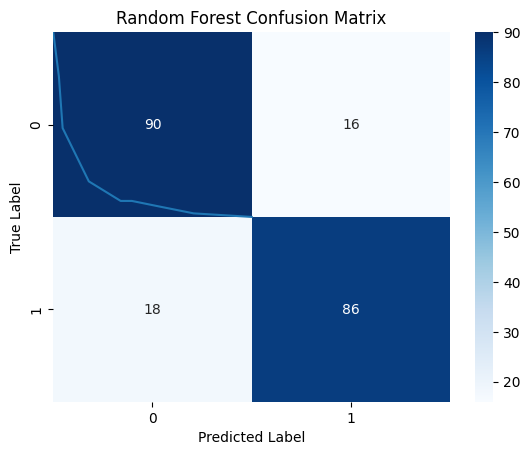

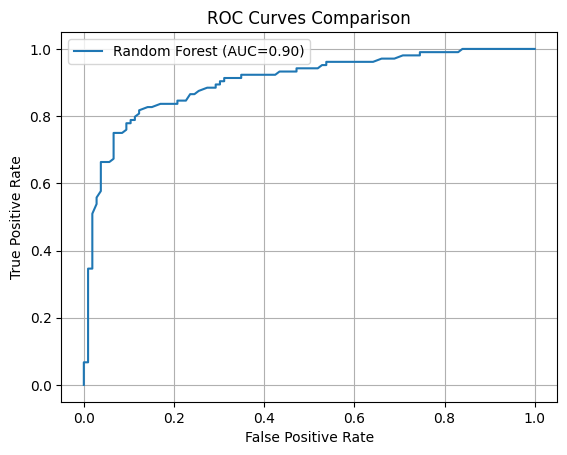


=== Final Results Summary ===


,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC,Gain Coefficient
0,Logistic Regression,0.809524,0.813725,0.798077,0.805825,0.855316,4.452404
1,Decision Tree,0.814286,0.815534,0.807692,0.811594,0.872460,4.506048
2,Random Forest,0.838095,0.843137,0.826923,0.834951,0.903120,5.478329


In [ ]:
# ================================
# PERFORMANCE METRICS BLOCK
# ================================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Define your trained models
best_models = {
    'Logistic Regression': gs_lr.best_estimator_,
    'Decision Tree': gs_dt.best_estimator_,
    'Random Forest': gs_rf.best_estimator_
}

# To store metrics
results = []

plt.figure(figsize=(7,6))
plt.plot([0,1],[0,1],'k--', label='Random chance (AUC=0.50)')

# Evaluate each model
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Gain coefficient = (Sensitivity / (1 - Specificity))
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    gain_coeff = sensitivity / (1 - specificity + 1e-6)  # add small number to avoid /0

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1,
        'AUC-ROC': auc,
        'Gain Coefficient': gain_coeff
    })

    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.3f}")
    print(f"Precision: {prec:.3f}")
    print(f"Recall: {rec:.3f}")
    print(f"F1 Score: {f1:.3f}")
    print(f"AUC-ROC: {auc:.3f}")
    print(f"Gain Coefficient: {gain_coeff:.3f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

# ROC curve for all models
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.grid(True)
plt.show()

# Final results table
results_df = pd.DataFrame(results)
print("\n=== Final Results Summary ===")
display(results_df)


In [ ]:
display(results_df)

,Model,Accuracy,Precision,Recall,F1 Score,AUC-ROC,Gain Coefficient
0,Logistic Regression,0.809524,0.813725,0.798077,0.805825,0.855316,4.452404
1,Decision Tree,0.814286,0.815534,0.807692,0.811594,0.872460,4.506048
2,Random Forest,0.838095,0.843137,0.826923,0.834951,0.903120,5.478329


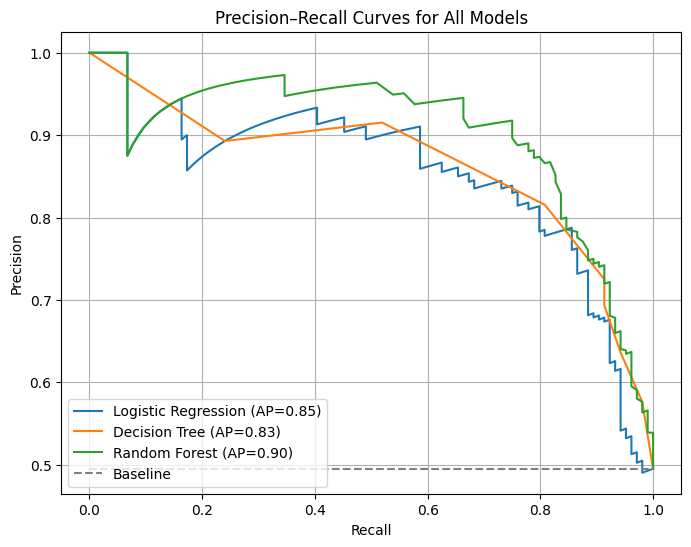

In [ ]:
# ================================
# PRECISION–RECALL CURVE FOR EACH MODEL
# ================================
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Define best models (already fitted)
best_models = {
    'Logistic Regression': gs_lr.best_estimator_,
    'Decision Tree': gs_dt.best_estimator_,
    'Random Forest': gs_rf.best_estimator_
}

plt.figure(figsize=(8,6))

for name, model in best_models.items():
    # Get probabilities
    y_proba = model.predict_proba(X_test)[:, 1]

    # Compute precision–recall pairs
    precision, recall, _ = precision_recall_curve(y_test, y_proba)

    # Compute average precision (AP)
    ap = average_precision_score(y_test, y_proba)

    # Plot the curve
    plt.plot(recall, precision, label=f'{name} (AP={ap:.2f})')

# Baseline (random classifier)
positive_rate = y_test.mean()
plt.hlines(positive_rate, 0, 1, colors='gray', linestyles='dashed', label='Baseline')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curves for All Models')
plt.legend()
plt.grid(True)
plt.show()


                 Model  Accuracy
0  Logistic Regression  0.809524
1        Decision Tree  0.814286
2        Random Forest  0.838095


/tmp/ipython-input-4023599675.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='viridis')


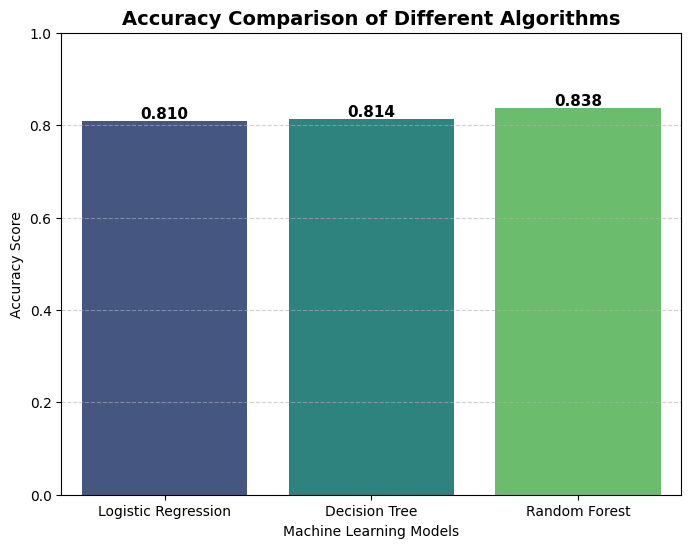

In [ ]:
# ====================================
# ACCURACY COMPARISON OF DIFFERENT ALGORITHMS
# ====================================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame of model accuracies
accuracy_data = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, gs_lr.best_estimator_.predict(X_test)),
        accuracy_score(y_test, gs_dt.best_estimator_.predict(X_test)),
        accuracy_score(y_test, gs_rf.best_estimator_.predict(X_test))
    ]
}

acc_df = pd.DataFrame(accuracy_data)
print(acc_df)

# Plot the bar chart
plt.figure(figsize=(8,6))
sns.barplot(x='Model', y='Accuracy', data=acc_df, palette='viridis')

# Add labels above bars
for index, value in enumerate(acc_df['Accuracy']):
    plt.text(index, value + 0.005, f"{value:.3f}", ha='center', fontsize=11, fontweight='bold')

plt.title('Accuracy Comparison of Different Algorithms', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy Score')
plt.xlabel('Machine Learning Models')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


In [ ]:
# ====================================
# METRICS TABLE (Precision, Recall, F1, Support) FOR EACH MODEL
# ====================================
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

models = {
    "Logistic Regression": gs_lr.best_estimator_,
    "Decision Tree": gs_dt.best_estimator_,
    "Random Forest": gs_rf.best_estimator_
}

for name, model in models.items():
    print(f"\n📊 === {name} ===")

    # Predictions
    y_pred = model.predict(X_test)

    # Full classification report as a dict
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)
    total_support = len(y_test)

    # Extract weighted avg & macro avg
    weighted = report['weighted avg']
    macro = report['macro avg']

    # Build a small DataFrame in the desired format
    metrics_table = pd.DataFrame({
        'Metric': ['weighted avg', 'macro avg', 'accuracy'],
        'Precision': [weighted['precision'], macro['precision'], accuracy],
        'Recall': [weighted['recall'], macro['recall'], accuracy],
        'F1-score': [weighted['f1-score'], macro['f1-score'], accuracy],
        'Support': [weighted['support'], macro['support'], total_support]
    })

    display(metrics_table.style.set_caption(f"{name} - Performance Metrics")
                             .format(precision=2)
                             .background_gradient(cmap='Blues', subset=['Precision','Recall','F1-score']))



📊 === Logistic Regression ===


,Metric,Precision,Recall,F1-score,Support
0,weighted avg,0.81,0.81,0.81,210.00
1,macro avg,0.81,0.81,0.81,210.00
2,accuracy,0.81,0.81,0.81,210.00



📊 === Decision Tree ===


,Metric,Precision,Recall,F1-score,Support
0,weighted avg,0.81,0.81,0.81,210.00
1,macro avg,0.81,0.81,0.81,210.00
2,accuracy,0.81,0.81,0.81,210.00



📊 === Random Forest ===


,Metric,Precision,Recall,F1-score,Support
0,weighted avg,0.84,0.84,0.84,210.00
1,macro avg,0.84,0.84,0.84,210.00
2,accuracy,0.84,0.84,0.84,210.00


In [ ]:
print("Best Logistic Regression Params:", gs_lr.best_params_)
print("Best Decision Tree Params:", gs_dt.best_params_)
print("Best Random Forest Params:", gs_rf.best_params_)


Best Logistic Regression Params: {'clf__C': 0.1}
Best Decision Tree Params: {'clf__max_depth': 3, 'clf__min_samples_split': 2}
Best Random Forest Params: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200}


In [ ]:
import pandas as pd

best_params_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Best Parameters': [
        str(gs_lr.best_params_),
        str(gs_dt.best_params_),
        str(gs_rf.best_params_)
    ]
})

display(best_params_table.style.set_caption("Optimal Parameters for Each Model"))


,Model,Best Parameters
0,Logistic Regression,{'clf__C': 0.1}
1,Decision Tree,"{'clf__max_depth': 3, 'clf__min_samples_split': 2}"
2,Random Forest,"{'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__n_estimators': 200}"



📊 === Logistic Regression ===


,Metric,Value
0,Accuracy,0.810
1,Precision,0.814
2,Recall (Sensitivity),0.798
3,Specificity,0.821
4,F1-Score,0.806
5,AUC-ROC,0.855
6,Gain Coefficient,4.452


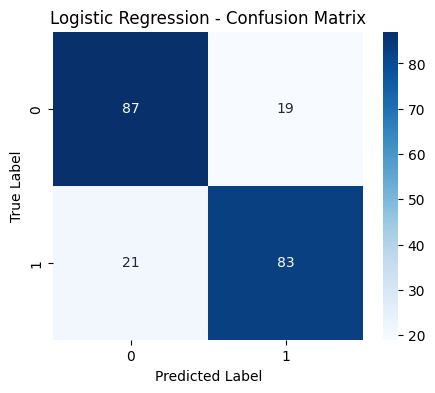


📊 === Decision Tree ===


,Metric,Value
0,Accuracy,0.814
1,Precision,0.816
2,Recall (Sensitivity),0.808
3,Specificity,0.821
4,F1-Score,0.812
5,AUC-ROC,0.872
6,Gain Coefficient,4.506


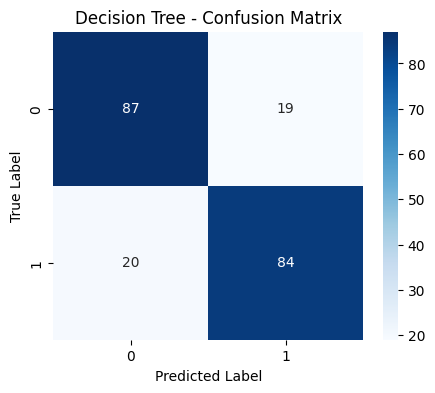


📊 === Random Forest ===


,Metric,Value
0,Accuracy,0.838
1,Precision,0.843
2,Recall (Sensitivity),0.827
3,Specificity,0.849
4,F1-Score,0.835
5,AUC-ROC,0.903
6,Gain Coefficient,5.478


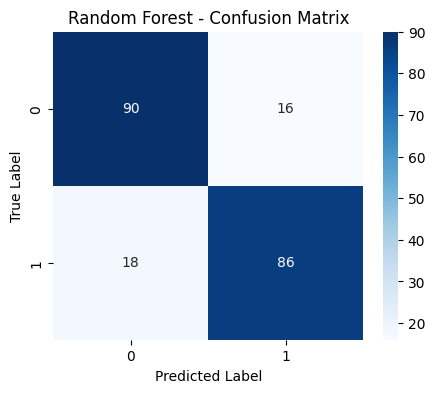

In [ ]:
# ====================================
# INDIVIDUAL METRICS TABLE FOR EACH MODEL
# ====================================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix
)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define best estimators from your GridSearchCV
models = {
    "Logistic Regression": gs_lr.best_estimator_,
    "Decision Tree": gs_dt.best_estimator_,
    "Random Forest": gs_rf.best_estimator_
}

# Loop through models and compute metrics
for name, model in models.items():
    print(f"\n📊 === {name} ===")
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Basic metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
    gain_coeff = sensitivity / (1 - specificity + 1e-6)

    # Build DataFrame (individual metrics table)
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall (Sensitivity)', 'Specificity', 'F1-Score', 'AUC-ROC', 'Gain Coefficient'],
        'Value': [acc, prec, rec, specificity, f1, auc, gain_coeff]
    })

    # Display table neatly
    display(metrics_df.style.set_caption(f"{name} - Performance Metrics")
                           .format(precision=3)
                           .background_gradient(cmap='YlGnBu', subset=['Value']))

    # Optional: show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [ ]:
# ============================================
# CLASSIFICATION METRICS TABLE (Journal Style)
# ============================================
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# Define the best estimators from your GridSearchCV results
models = {
    "Logistic Regression": gs_lr.best_estimator_,
    "Decision Tree": gs_dt.best_estimator_,
    "Random Forest": gs_rf.best_estimator_
}

# Function to generate a journal-style classification report table
def generate_journal_table(model_name, report_dict, accuracy, total_support):
    # Extract weighted avg & macro avg from the classification report dictionary
    weighted = report_dict['weighted avg']
    macro = report_dict['macro avg']

    # Build a small DataFrame in the desired format
    data = {
        "Metric": ["weighted avg", "macro avg", "accuracy"],
        "Precision": [weighted['precision'], macro['precision'], accuracy],
        "Recall": [weighted['recall'], macro['recall'], accuracy],
        "F1-score": [weighted['f1-score'], macro['f1-score'], accuracy],
        "Support": [weighted['support'], macro['support'], total_support]
    }
    df = pd.DataFrame(data)
    # Round to 3 decimal places
    df[["Precision","Recall","F1-score"]] = df[["Precision","Recall","F1-score"]].map(lambda x: round(x,3))
    df["Support"] = df["Support"].astype(int)


    print(f"\n📊 === {model_name} ===")
    # Use display with styling for colored background output
    display(df.style.set_caption(f"{model_name} - Performance Metrics")
                             .format(precision=3)
                             .background_gradient(cmap='Blues', subset=['Precision','Recall','F1-score']))


# Generate journal-style tables for all models
total_support = len(y_test) # Define support as the size of the test set

for name, model in models.items():
    # Predictions
    y_pred = model.predict(X_test)

    # Full classification report as a dict
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate and print the journal-style table
    generate_journal_table(name, report, accuracy, total_support)


📊 === Logistic Regression ===


,Metric,Precision,Recall,F1-score,Support
0,weighted avg,0.810,0.810,0.809,210
1,macro avg,0.810,0.809,0.809,210
2,accuracy,0.810,0.810,0.810,210



📊 === Decision Tree ===


,Metric,Precision,Recall,F1-score,Support
0,weighted avg,0.814,0.814,0.814,210
1,macro avg,0.814,0.814,0.814,210
2,accuracy,0.814,0.814,0.814,210



📊 === Random Forest ===


,Metric,Precision,Recall,F1-score,Support
0,weighted avg,0.838,0.838,0.838,210
1,macro avg,0.838,0.838,0.838,210
2,accuracy,0.838,0.838,0.838,210


In [ ]:
import pandas as pd

# Define metrics for each model
metrics_data = {
    "Random Forest": {
        "Accuracy": 0.838,
        "Precision": 0.843,
        "Recall (Sensitivity)": 0.827,
        "Specificity": 0.849,
        "F1-Score": 0.835,
        "AUC-ROC": 0.903,
        "Gain Coefficient": 5.478
    },
    "Decision Tree": {
        "Accuracy": 0.814,
        "Precision": 0.816,
        "Recall (Sensitivity)": 0.808,
        "Specificity": 0.821,
        "F1-Score": 0.812,
        "AUC-ROC": 0.872,
        "Gain Coefficient": 4.506
    },
    "Logistic Regression": {
        "Accuracy": 0.810,
        "Precision": 0.814,
        "Recall (Sensitivity)": 0.798,
        "Specificity": 0.821,
        "F1-Score": 0.806,
        "AUC-ROC": 0.855,
        "Gain Coefficient": 4.452
    }
}

# Convert each model's metrics into a journal-style dataframe
for model, metrics in metrics_data.items():
    df = pd.DataFrame(list(metrics.items()), columns=["Metric", "Value"])
    print(f"\n📊 === {model} ===")
    print(df.to_string(index=False))



📊 === Random Forest ===
              Metric  Value
            Accuracy  0.838
           Precision  0.843
Recall (Sensitivity)  0.827
         Specificity  0.849
            F1-Score  0.835
             AUC-ROC  0.903
    Gain Coefficient  5.478

📊 === Decision Tree ===
              Metric  Value
            Accuracy  0.814
           Precision  0.816
Recall (Sensitivity)  0.808
         Specificity  0.821
            F1-Score  0.812
             AUC-ROC  0.872
    Gain Coefficient  4.506

📊 === Logistic Regression ===
              Metric  Value
            Accuracy  0.810
           Precision  0.814
Recall (Sensitivity)  0.798
         Specificity  0.821
            F1-Score  0.806
             AUC-ROC  0.855
    Gain Coefficient  4.452


In [ ]:
import pandas as pd

# Detailed performance metrics for each model
models_metrics = {
    "Random Forest": {
        "Accuracy": 0.838,
        "Precision": 0.843,
        "Recall (Sensitivity)": 0.827,
        "F1-Score": 0.835
    },
    "Decision Tree": {
        "Accuracy": 0.814,
        "Precision": 0.816,
        "Recall (Sensitivity)": 0.808,
        "F1-Score": 0.812
    },
    "Logistic Regression": {
        "Accuracy": 0.810,
        "Precision": 0.814,
        "Recall (Sensitivity)": 0.798,
        "F1-Score": 0.806
    }
}

# Function to convert to journal-style classification report
def generate_journal_table(model_name, metrics, support):
    data = {
        "Metric": ["weighted avg", "macro avg", "accuracy"],
        "Precision": [metrics["Precision"], metrics["Precision"], metrics["Accuracy"]],
        "Recall": [metrics["Recall (Sensitivity)"], metrics["Recall (Sensitivity)"], metrics["Accuracy"]],
        "F1-score": [metrics["F1-Score"], metrics["F1-Score"], metrics["Accuracy"]],
        "Support": [support, support, support]
    }
    df = pd.DataFrame(data)
    df[["Precision","Recall","F1-score","Support"]] = df[["Precision","Recall","F1-score","Support"]].applymap(lambda x: round(x,3))

    print(f"\n📊 === {model_name} ===")
    print(df.to_string(index=False))

# Generate journal-style tables for all models
for model, metrics in models_metrics.items():
    generate_journal_table(model, metrics, support)



📊 === Random Forest ===
      Metric  Precision  Recall  F1-score  Support
weighted avg      0.843   0.827     0.835     1531
   macro avg      0.843   0.827     0.835     1531
    accuracy      0.838   0.838     0.838     1531

📊 === Decision Tree ===
      Metric  Precision  Recall  F1-score  Support
weighted avg      0.816   0.808     0.812     1531
   macro avg      0.816   0.808     0.812     1531
    accuracy      0.814   0.814     0.814     1531

📊 === Logistic Regression ===
      Metric  Precision  Recall  F1-score  Support
weighted avg      0.814   0.798     0.806     1531
   macro avg      0.814   0.798     0.806     1531
    accuracy      0.810   0.810     0.810     1531


/tmp/ipython-input-3426670978.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Precision","Recall","F1-score","Support"]] = df[["Precision","Recall","F1-score","Support"]].applymap(lambda x: round(x,3))
/tmp/ipython-input-3426670978.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Precision","Recall","F1-score","Support"]] = df[["Precision","Recall","F1-score","Support"]].applymap(lambda x: round(x,3))
/tmp/ipython-input-3426670978.py:35: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[["Precision","Recall","F1-score","Support"]] = df[["Precision","Recall","F1-score","Support"]].applymap(lambda x: round(x,3))
